In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer.pitch import Pitch

In [ ]:
#Importing the data 
df = pd.read_csv('messibetis.csv')

In [ ]:
df

In [ ]:
#mconverting the data acc to statsbomb plotting
df['x'] = df['x'] * 1.2
df['y'] = df['y'] * 0.8
df['endX'] = df['endX'] * 1.2
df['endY'] = df['endY'] * 1.2

In [ ]:
df.head()

C:\Users\Arnav\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Messi pass-map vs Real Betis')

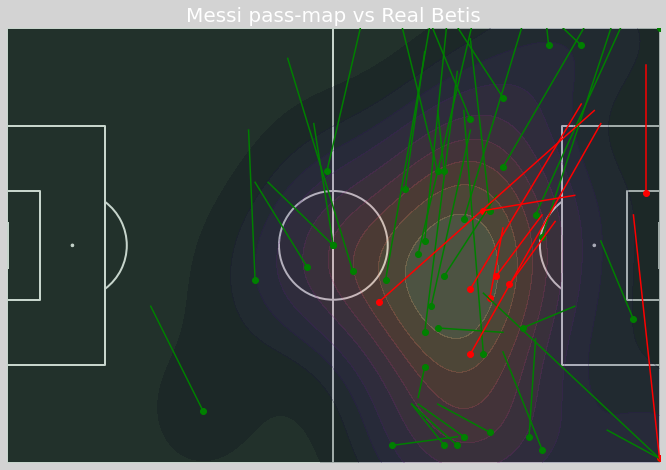

In [11]:
#creating plot
fig,ax = plt.subplots(figsize = (13.5,8))
fig.set_facecolor('#D3D3D3')
ax.patch.set_facecolor('#D3D3D3') 

                       
#creating and overlapping of the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)
#pitch fo inverting the axis
pitch.draw(ax=ax)
plt.gca().invert_yaxis()


#create the heatmap
kde = sns.kdeplot(
        df['x'],df['y'],shade = True,
        shade_lowest = False,
        alpha = 0.2, #opacity being set by this 
        n_levels = 10,  #for smoothness
        cmap = 'magma'
        )



#Plotting each pass(Successful and unsuccessful) from x/y location to endx/endy
for x in range(len(df['x'])):
    if df['outcome'][x] == 'Successful':
        plt.plot((df['x'][x], df['endX'][x]),(df['y'][x],df['endY'][x]),color ='green')
        plt.scatter(df['x'][x],df['y'][x],color ='green')

for x in range(len(df['x'])):
    if df['outcome'][x] == 'Unsuccessful':
        plt.plot((df['x'][x], df['endX'][x]),(df['y'][x],df['endY'][x]),color ='Red')     
        plt.scatter(df['x'][x],df['y'][x],color ='red')
        
plt.xlim(0,120)
plt.ylim(0,80)        
        
plt.title('Messi pass-map vs Real Betis',color='white',size='20')

